Here I will construct a CNN within tensorflow to identify the type of flower, won't actually be running this code here though becuase it requires a GPU, so that'll happen on a remote server but let's get the basics down here!


https://www.kaggle.com/alxmamaev/flowers-recognition

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd flowers/daisy

/Users/noahkasmanoff/MachLearn/hw4/flowers/daisy


In [30]:
filename =  '5794839_200acd910c_n.jpg'

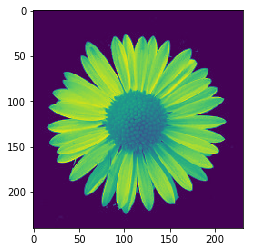

In [31]:
img=cv2.imread(filename)
plt.imshow(imgray)

So basically the cells above convert this into an array, (1066, 1599, 3)  3 representing RGB vals, so that's on track with this flower recog software

Next up is to design the CNN... 

Pulling from Aymerican Dreams...




In [32]:

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [.299,.587,.114])



In [33]:
imgray = rgb2gray(img)

In [50]:
imgray

array([[230.057, 227.769, 225.769, ...,  70.684,  69.673,  68.673],
       [227.057, 224.769, 223.367, ...,  71.684,  71.684,  71.673],
       [226.769, 224.769, 222.367, ...,  73.157,  73.157,  73.684],
       ...,
       [ 30.603,  30.603,  29.603, ...,  36.174,  37.174,  37.402],
       [ 31.603,  31.603,  31.603, ...,  35.174,  36.174,  36.174],
       [ 32.603,  32.603,  32.603, ...,  34.647,  34.647,  34.174]])

In [35]:
np.shape(imgray)[0]

240

In [ ]:
#should convert vals to float 32, will get on that later.
# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 10

# Network Parameters
num_input = np.shape(imgray)[0]*np.shape(imgray)[1]  # Flower data input (img shape: x*y)
num_classes = 10 #total flower classes, daisy, etc. 5 total 
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [ ]:

# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    
    ###### Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, , 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
np.shape(imgray)